In [ ]:
import os
import pandas as pd
from DOPU_given_timerange import get_cleaned_df

get_cleaned_df

df = pd.read_parquet("all_cleaned_data/all_cleaned_data.parquet")
df.head()

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(df.drop(["store_and_fwd_flag", "Airport_fee", "VendorID", "RatecodeID", "tpep_pickup_datetime", "tpep_dropoff_datetime"], axis=1).corr())
plt.show()

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os


df = pd.read_parquet("all_cleaned_data/all_cleaned_data.parquet")
df.head()

,VendorID,PickupDatetime,DropoffDatetime,TripDuration,PassengerCount,TripDistance,PULocationID,DOLocationID,PaymentType,FareAmount,ExtraCharges,MTATax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,CongestionSurcharge,AirportFee
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,11.500000,1.0,1.98,236,239,1.0,12.8,1.0,0.5,3.61,0.0,1.0,21.66,2.75,0.0
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,20.866667,5.0,6.54,65,170,1.0,30.3,1.0,0.5,7.11,0.0,1.0,42.66,2.75,0.0
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,19.033333,1.0,3.08,74,262,1.0,19.8,1.0,0.5,3.00,0.0,1.0,28.05,2.75,0.0
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,11.866667,1.0,2.40,74,116,2.0,14.2,1.0,1.5,0.00,0.0,1.0,16.70,0.00,0.0
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,10.983333,1.0,5.14,74,243,1.0,22.6,1.0,0.5,6.28,0.0,1.0,31.38,0.00,0.0


### Distribution of Pickups by Hour of Day
- The number of pickups varies significantly by hour.
- The number of trips starts increasing significantly from 7-8 AM and continues to rise steadily throughout the day.
- The highest peak occurs between 5-6 PM, likely due to the evening commute.
- Late-night pickups (after 10 PM) are fewer but still present, indicating demand for nightlife and airport trips.
- This confirms that **time is a crucial factor for demand prediction** and should be included as a feature in XGBoost.
    

C:\Users\xiqiz\AppData\Local\Temp\ipykernel_6644\80496454.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PickupHour", data=df, palette="viridis")


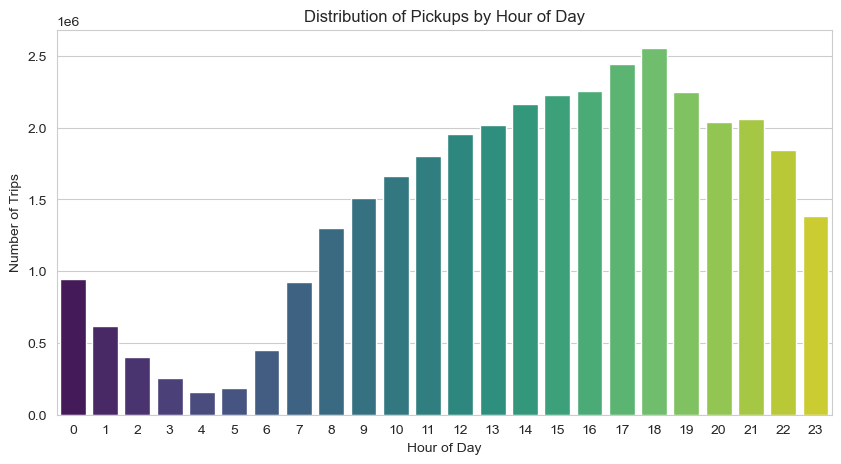

In [2]:
# -------------------------
# Analyze the distribution of PickupDatetime to see if there are specific peak times.
# -------------------------
df["PickupDatetime"] = pd.to_datetime(df["PickupDatetime"])

df["PickupHour"] = df["PickupDatetime"].dt.hour

plt.figure(figsize=(10, 5))
sns.countplot(x="PickupHour", data=df, palette="viridis")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Distribution of Pickups by Hour of Day")
plt.show()


### Trip Duration & Distance Distribution

- Most taxi trips are short-distance and have a duration of 10-20 minutes, covering 2-5 miles on average.
- The distribution is right-skewed, meaning that while most trips are short, there are a few long-distance trips (>10 miles) that occur less frequently.

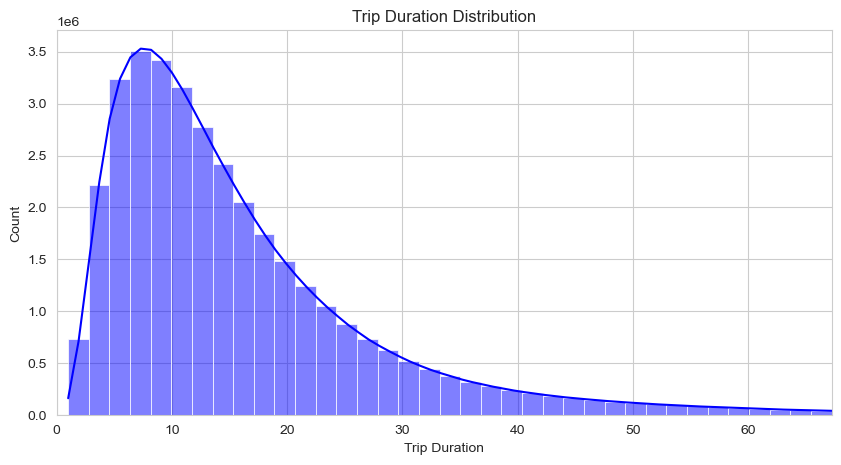

In [3]:
# -------------------------
# Trip duration distribution
# -------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df["TripDuration"], bins=100, kde=True, color="blue")
plt.xlim(0, df["TripDuration"].quantile(0.99))
plt.xlabel("Trip Duration")
plt.ylabel("Count")
plt.title("Trip Duration Distribution")
plt.show()

In [4]:
print(df["TripDistance"].describe())

count    3.544538e+07
mean     3.173742e+00
std      3.976016e+00
min      5.000000e-02
25%      1.020000e+00
50%      1.700000e+00
75%      3.180000e+00
max      4.987000e+01
Name: TripDistance, dtype: float64


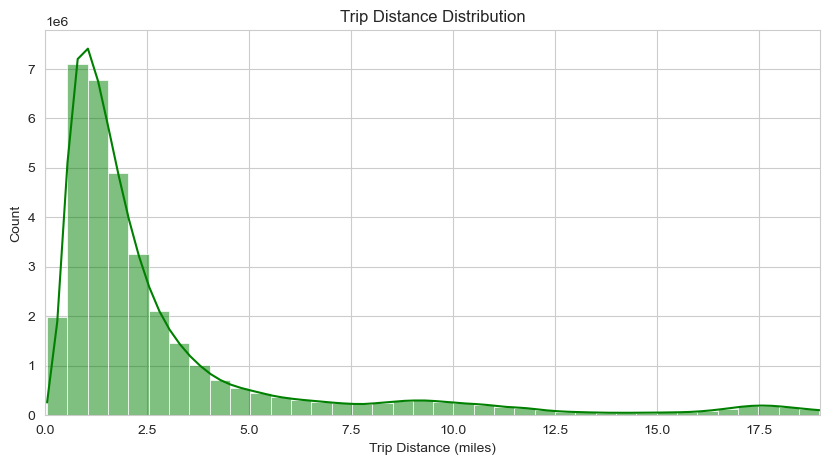

In [5]:
# -------------------------
# Trip distance distribution
# -------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df["TripDistance"], bins=100, kde=True, color="green")
plt.xlim(0, df["TripDistance"].quantile(0.99))
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Count")
plt.title("Trip Distance Distribution")
plt.show()


### Fare & Total Revenue Distribution
- The majority of trips have a **fare amount between 0-20**, with a few high-value trips.
- Some trips have exceptionally high fares (>$60), possibly representing **airport or long-distance trips**.
- The **total revenue distribution follows a similar pattern**, with high-value trips being less frequent but financially impactful.
- This indicates that **fare amount and revenue should be key features in the prediction model**.

In [6]:
print(df[["FareAmount", "TipAmount", "TotalAmount"]].describe())

         FareAmount     TipAmount   TotalAmount
count  3.544538e+07  3.544538e+07  3.544538e+07
mean   1.849190e+01  3.412520e+00  2.735774e+01
std    1.487677e+01  3.356787e+00  1.907173e+01
min    1.000000e-02  0.000000e+00  1.000000e-02
25%    9.300000e+00  1.000000e+00  1.596000e+01
50%    1.350000e+01  2.880000e+00  2.095000e+01
75%    2.120000e+01  4.400000e+00  2.988000e+01
max    9.000000e+01  1.899000e+01  1.060900e+02


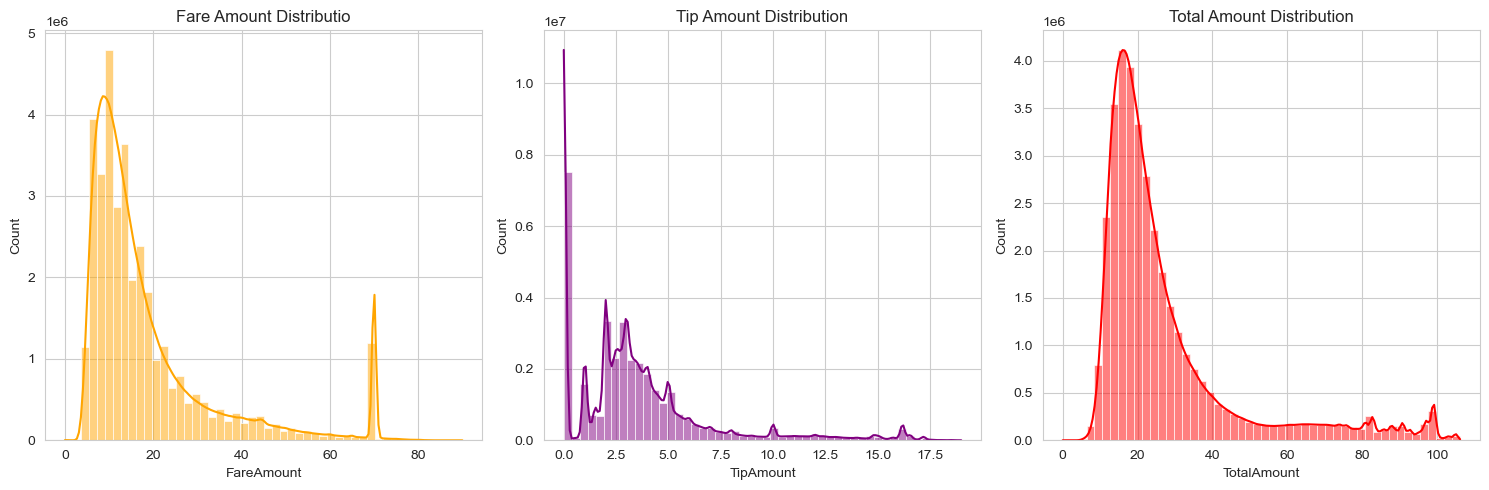

In [7]:
# -------------------------
# FareAmount, TipAmount, TotalAmount distribution
# -------------------------

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df["FareAmount"], bins=50, kde=True, ax=axes[0], color="orange")
axes[0].set_title("Fare Amount Distributio")

sns.histplot(df["TipAmount"], bins=50, kde=True, ax=axes[1], color="purple")
axes[1].set_title("Tip Amount Distribution")

sns.histplot(df["TotalAmount"], bins=50, kde=True, ax=axes[2], color="red")
axes[2].set_title("Total Amount Distribution")

plt.tight_layout()
plt.show()


### Pickup & Dropoff Hotspots
- Some zones have significantly higher pickup/dropoff counts than others.
- **Business districts, airports, and entertainment hubs** appear to be high-demand areas.
- This suggests that drivers should **optimize their locations based on pickup probability**.
- It also highlights the importance of **spatial features (PULocationID, DOLocationID) in the model**.

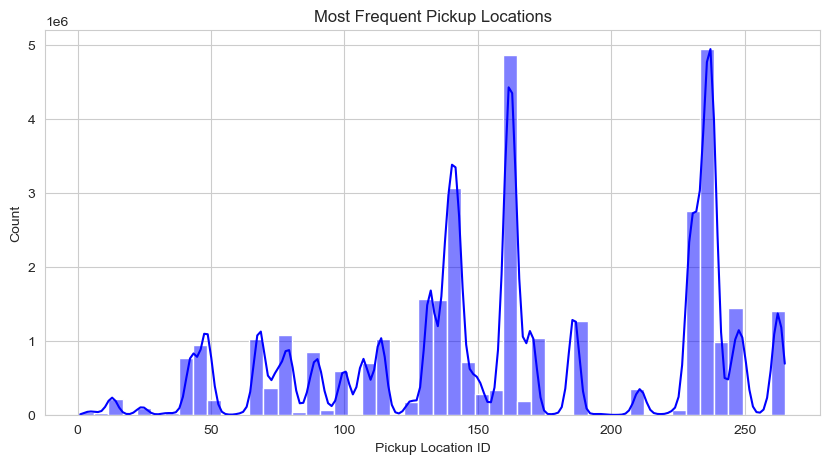

In [8]:
# -------------------------
# Popular pick-up locations
# -------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df["PULocationID"], bins=50, kde=True, color="blue")
plt.xlabel("Pickup Location ID")
plt.ylabel("Count")
plt.title("Most Frequent Pickup Locations")
plt.show()


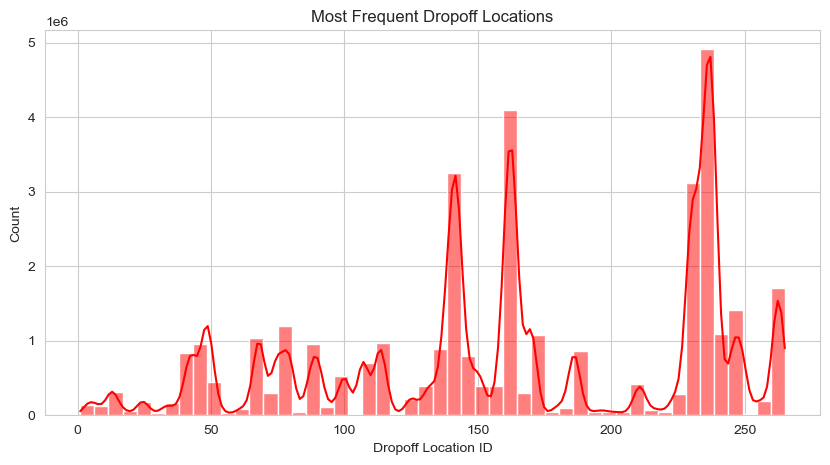

In [9]:
# -------------------------
# Popular drop-off locations
# -------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df["DOLocationID"], bins=50, kde=True, color="red")
plt.xlabel("Dropoff Location ID")
plt.ylabel("Count")
plt.title("Most Frequent Dropoff Locations")
plt.show()


### Total Revenue per Zone
- The revenue distribution across pickup zones is highly **uneven**.
- **Zone 132 and Zone 138** generate significantly higher total revenue compared to other zones.
- This suggests that these zones are **high-value areas**, possibly major business hubs, airports, or high-demand locations.
- The presence of other moderate-revenue zones indicates that while some zones dominate in earnings, other zones still contribute substantially to overall revenue.
- These findings can help optimize **MDP decision-making**, as high-revenue zones may be preferable locations for drivers.

In [10]:
# Calculate the total revenue for each region
revenue_per_zone = df.groupby('PULocationID')['TotalAmount'].sum().reset_index()
# Sort by total revenue per region, from high to low
revenue_per_zone = revenue_per_zone.sort_values(by='TotalAmount', ascending=False)

C:\Users\xiqiz\AppData\Local\Temp\ipykernel_6644\2612456912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_per_zone.head(20), x="PULocationID", y="TotalAmount", palette="viridis")


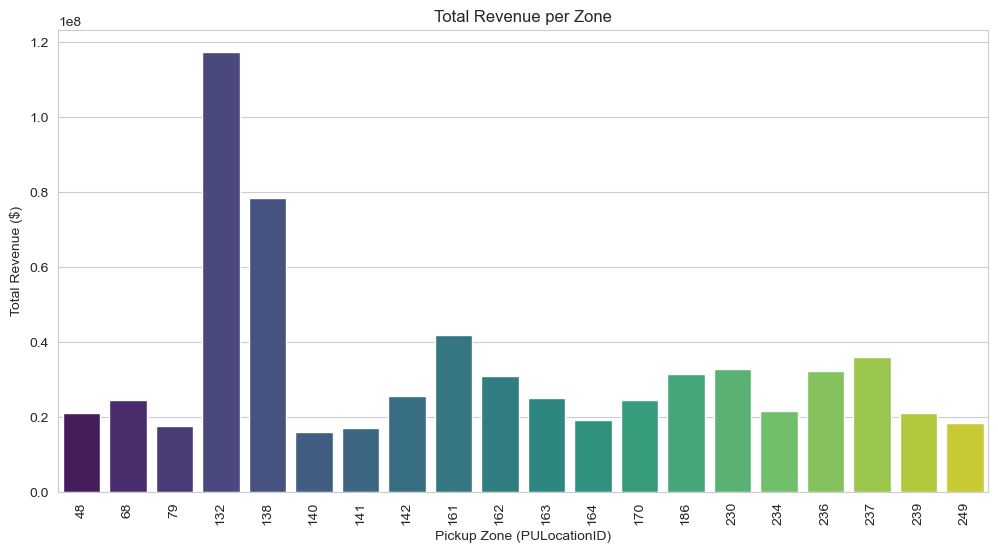

In [11]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_per_zone.head(20), x="PULocationID", y="TotalAmount", palette="viridis")

plt.xlabel("Pickup Zone (PULocationID)")
plt.ylabel("Total Revenue ($)")
plt.title("Total Revenue per Zone")
plt.xticks(rotation=90)
plt.show()


### Hourly Revenue Trends for Top 5 Zones
- The revenue trends vary significantly across different high-revenue zones.
- **Zone 132** exhibits the highest revenue throughout the day, with a clear peak between **16:00 - 20:00**.
- **Zone 138 and Zone 161** follow a similar upward trend, peaking in the evening hours.
- **Zones 230 and 237** maintain relatively stable revenue patterns throughout the day, with fewer fluctuations.
- The differences in hourly trends suggest that some zones are **time-dependent high-revenue areas**, meaning revenue potential fluctuates based on the time of day.
- Understanding these temporal patterns is crucial for **both XGBoost revenue prediction and MDP decision-making**, as drivers may need to adapt their strategies dynamically.

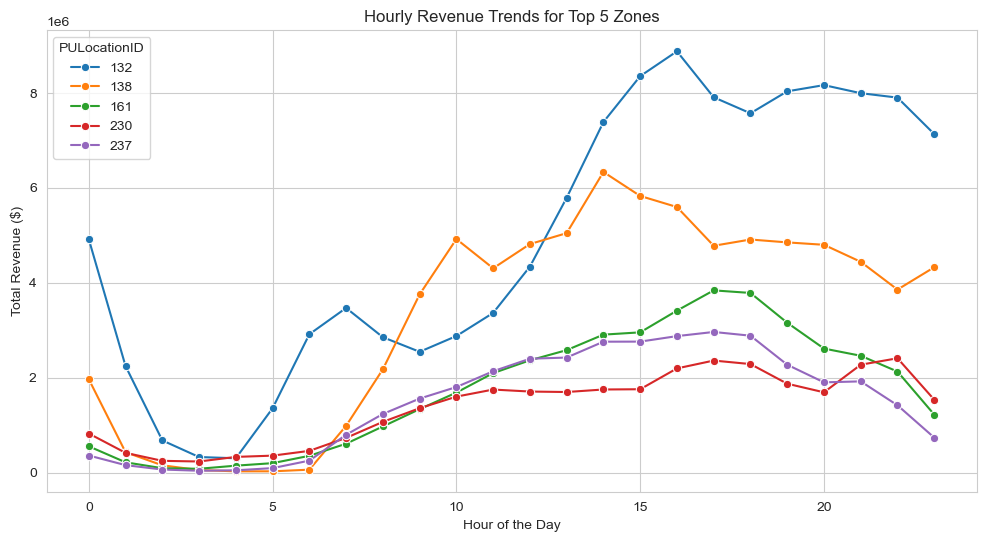

In [22]:
# Ensure that the pickup time is in datetime format
df['PickupDatetime'] = pd.to_datetime(df['PickupDatetime'])

# Extract hour information from pickup time
df['hour'] = df['PickupDatetime'].dt.hour

# Compute total revenue per zone per hour
revenue_per_zone_hourly = df.groupby(['PULocationID', 'hour'])['TotalAmount'].sum().reset_index()

# Plot revenue trends for the top 5 highest revenue zones
top_zones = revenue_per_zone_hourly.groupby('PULocationID')['TotalAmount'].sum().nlargest(5).index
df_top_zones = revenue_per_zone_hourly[revenue_per_zone_hourly['PULocationID'].isin(top_zones)]

# Define custom colors (manually selected high-contrast colors)
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_zones, x='hour', y='TotalAmount', hue='PULocationID', marker='o', palette=custom_colors)

plt.xlabel("Hour of the Day")
plt.ylabel("Total Revenue ($)")
plt.title("Hourly Revenue Trends for Top 5 Zones")
plt.legend(title="PULocationID")
plt.grid(True)
plt.show()


### Variable Correlation Analysis
- **Trip distance, trip duration, and fare amount are highly correlated (>0.85).**
- **Tip amount shows a weaker correlation (<0.6)**, indicating that tips may be influenced more by passenger behavior than trip characteristics.
- These relationships help confirm which features should be included in the prediction model.

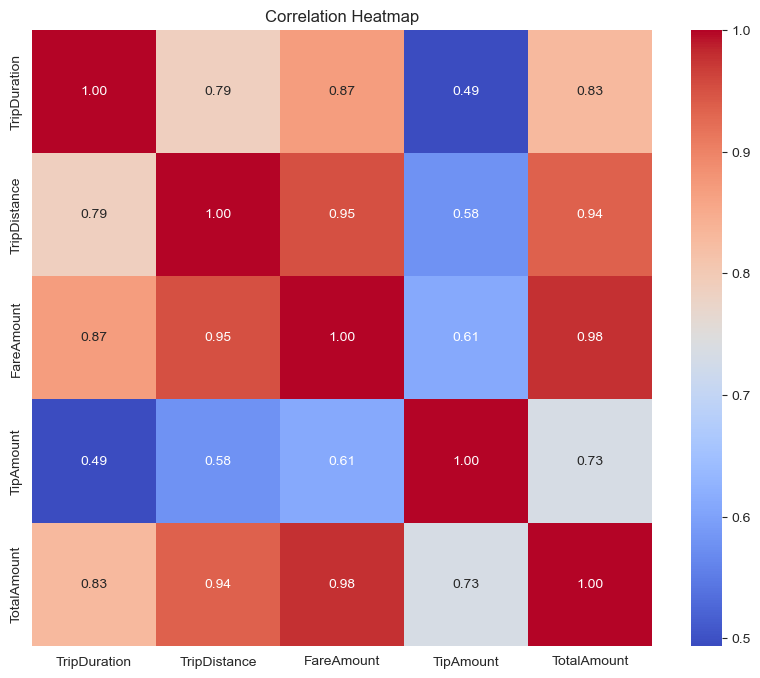

In [12]:
# -------------------------
# Correlation analysis
# -------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(df[["TripDuration", "TripDistance", "FareAmount", "TipAmount", "TotalAmount"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## **Conclusion**
**The dataset is fundamentally suitable for modeling.**

- The dataset contains **time, location, revenue, and trip-related features**, making it viable for **XGBoost-based expected revenue prediction**.
- It includes **pickup and dropoff locations, movement patterns, and revenue data**, which can be used to compute **MDP state transition probabilities and reward functions**.


## Further exploration

C:\Users\xiqiz\AppData\Local\Temp\ipykernel_19396\4213850772.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=long_trip_ratio.index[:20], y=long_trip_ratio['Long Trip'][:20], palette="coolwarm")


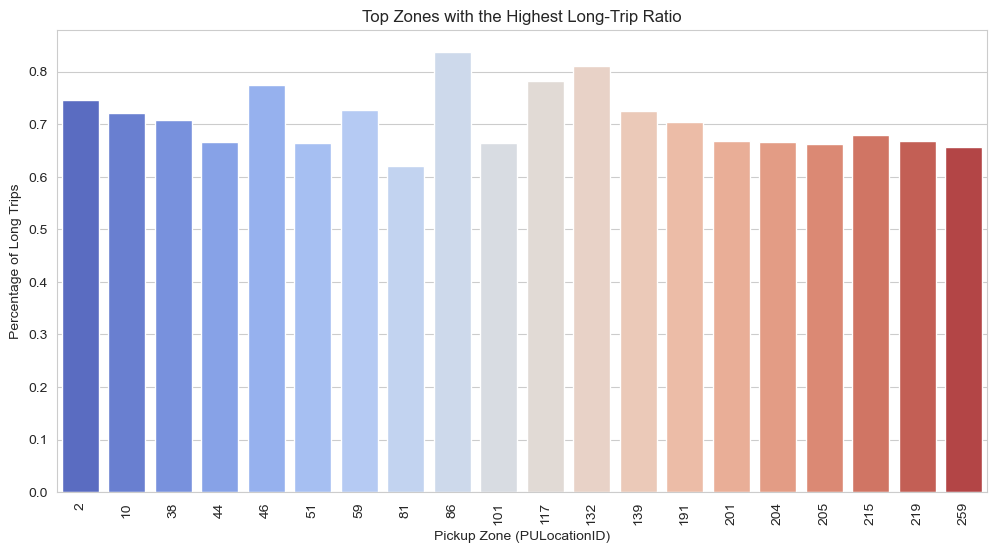

In [24]:
import numpy as np

# Define long-distance trips
df['trip_type'] = np.where(df['TripDistance'] > 10, 'Long Trip', 'Short Trip')

# Compute percentage of long trips per zone
long_trip_ratio = df.groupby('PULocationID')['trip_type'].value_counts(normalize=True).unstack().fillna(0)

# Sort by long trip percentage
long_trip_ratio = long_trip_ratio.sort_values(by='Long Trip', ascending=False)

# Plot top zones with the highest long-trip ratio
plt.figure(figsize=(12, 6))
sns.barplot(x=long_trip_ratio.index[:20], y=long_trip_ratio['Long Trip'][:20], palette="coolwarm")
plt.xlabel("Pickup Zone (PULocationID)")
plt.ylabel("Percentage of Long Trips")
plt.title("Top Zones with the Highest Long-Trip Ratio")
plt.xticks(rotation=90)
plt.show()


C:\Users\xiqiz\AppData\Local\Temp\ipykernel_19396\1080458777.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_comparison, x='trip_type', y='TotalAmount', palette="muted")


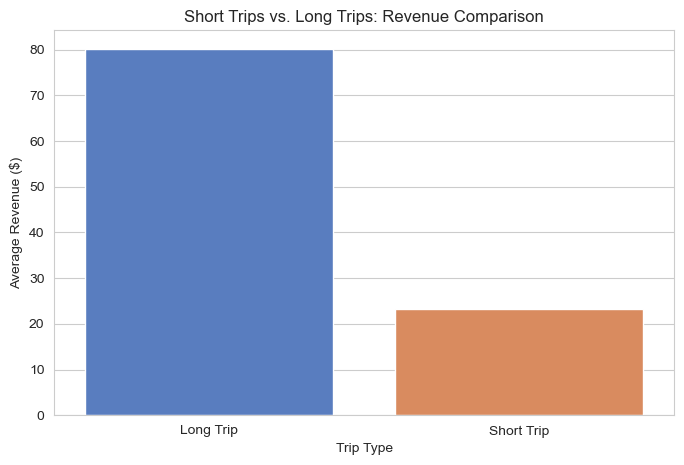

In [26]:
# Compare revenue per trip for short and long trips
revenue_comparison = df.groupby('trip_type')['TotalAmount'].mean().reset_index()

# Plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_comparison, x='trip_type', y='TotalAmount', palette="muted")
plt.xlabel("Trip Type")
plt.ylabel("Average Revenue ($)")
plt.title("Short Trips vs. Long Trips: Revenue Comparison")
plt.show()
